# Interpolation of data
- Huy Binh


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

$$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\ $$

Here, $ f^{(n)} $ is the nth derivative and $ x_0 $ is the argument around which we expand the function

### 1.1 Example: Exponential function

$$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) $$

error value exact -2.7312660577649694e-08


/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/3468317183.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t  + np.exp(x0)*(x-x0)**n / np.math.factorial(n)


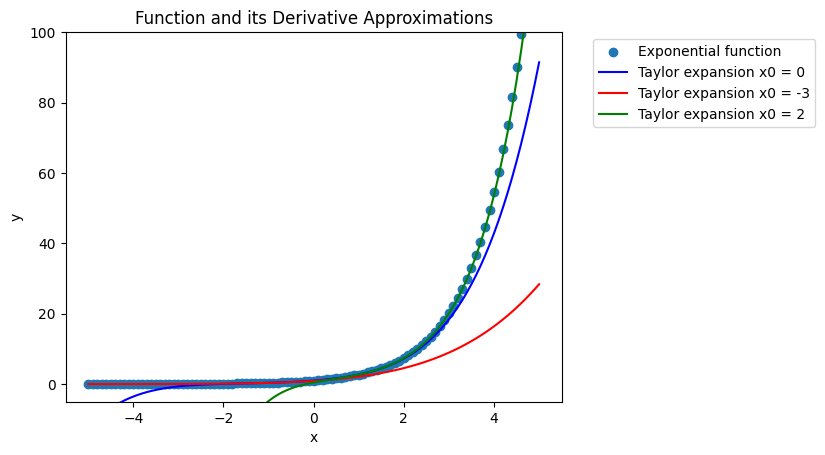

In [2]:
def expTaylor(x,x0,nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate

    t = 0
    for n in range (nmax+1):
        t = t  + np.exp(x0)*(x-x0)**n / np.math.factorial(n)
    return t 

print("error value exact", expTaylor(1,0,10)-np.exp(1))

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])


x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list), label = "Exponential function")


nmax = 5
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'blue', label = "Taylor expansion x0 = 0")
plt.plot(x_list, expTaylor(x_list, -3, nmax), 'red', label = "Taylor expansion x0 = -3")
plt.plot(x_list, expTaylor(x_list, 2, nmax), 'green', label = "Taylor expansion x0 = 2" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative Approximations')
plt.show()

### 1.2 Example: sin function at $ x_0 = 0 $

$$ f(0) = f''(0) = f^{(4)}(0) = \dots = 0 $$

$$ f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 $$

$$ f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 $$

$$ \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} $$

/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/2811149736.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**n*x**(2*n+1)/np.math.factorial(2*n+1)


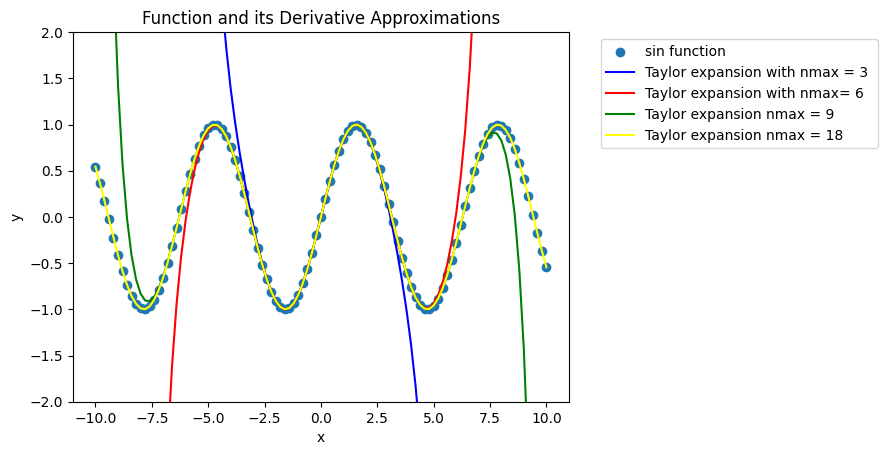

In [3]:
def sinTaylor(x,nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate

    t = 0
    for n in range (nmax+1):
        t = t + (-1)**n*x**(2*n+1)/np.math.factorial(2*n+1)
    return t 


plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])


x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list), label = "sin function")


plt.plot(x_list, sinTaylor(x_list, 3), 'blue', label = "Taylor expansion with nmax = 3 ")
plt.plot(x_list, sinTaylor(x_list, 6), 'red', label = "Taylor expansion with nmax= 6")
plt.plot(x_list, sinTaylor(x_list, 9), 'green', label = "Taylor expansion nmax = 9" )
plt.plot(x_list, sinTaylor(x_list, 18), 'yellow', label = "Taylor expansion nmax = 18" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative Approximations')
plt.show()

- Accuracy of $ \sin(10.5) $

In [4]:
np.sin(10.5) - sinTaylor(10.5, 60)

/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/2811149736.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**n*x**(2*n+1)/np.math.factorial(2*n+1)


-2.845501612114276e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): $$ f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $$

In [5]:
def derivative(f,x,h):
    return (f(x+h) - f(x)) / h

Higher derivatives: $$ f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh) $$

In [6]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative

    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n)/ (np.math.factorial(k)) * f(x+k*h)
    return t / h**n
        

Create a class function and test with sinus function 

12.04772926022427
2.5529969724111723
12.04772926022427


/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/1452530869.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k + n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k)) * self.f(x + k * h)
/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/1452530869.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + self.nDerivative(x0, h, n) * (x - x0)**n / np.math.factorial(n)


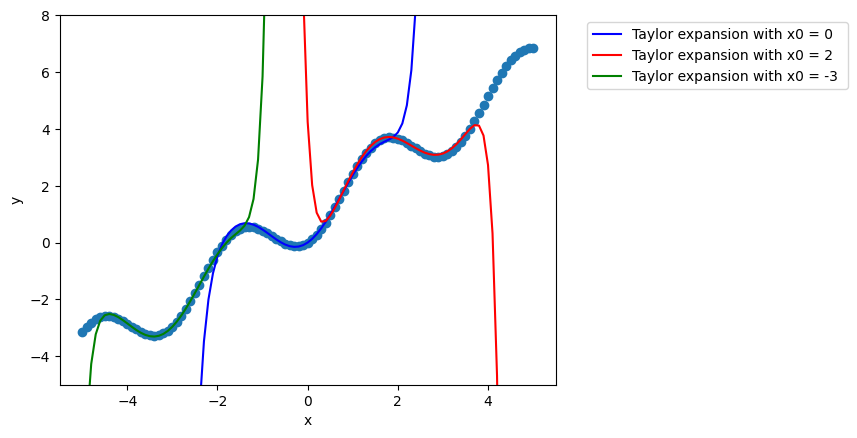

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class derivativeFunc:

    def f(self, x):
        t = 2 * np.sin(x)**2 + x
        return t

    def derivative(self, x, h):
        return (self.f(x + h) - self.f(x)) / h

    def nDerivative(self, x, h, n):
        t = 0
        for k in range(n + 1):
            t = t + (-1)**(k + n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k)) * self.f(x + k * h)
        return t / h**n

    def taylor(self, x, x0, nmax, h):
        t = 0
        for n in range(nmax + 1):
            t = t + self.nDerivative(x0, h, n) * (x - x0)**n / np.math.factorial(n)
        return t


x0 = 10.5
h = 0.1
n = 0

deriv_func = derivativeFunc()

print(deriv_func.f(x0))
print(deriv_func.derivative(x0, h))
print(deriv_func.nDerivative(x0, h, n))

x_list = np.linspace(-5, 5, 101)
h_int = 0.05
nmax = 15

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 8])
plt.scatter(x_list, deriv_func.f(x_list))
plt.plot(x_list, deriv_func.taylor(x_list, 0, nmax, h_int), 'blue', label="Taylor expansion with x0 = 0 ")
plt.plot(x_list, deriv_func.taylor(x_list, 2, nmax, h_int), 'red', label="Taylor expansion with x0 = 2 ")
plt.plot(x_list, deriv_func.taylor(x_list, -3, nmax, h_int), 'green', label="Taylor expansion with x0 = -3 ")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/3127061859.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
/var/folders/lk/3s873myd73q2lv3wl49q7n6h0000gn/T/ipykernel_2794/3127061859.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)


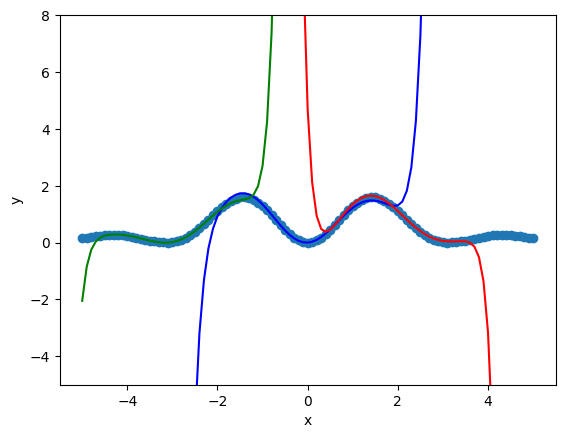

In [8]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

def taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: Stepsize
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return t

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')


## 2. Interpolation

### 2.1 Generate data points

In [9]:
def correctFunction(x):
    return - 0.35*x**3 - 0.5*x**2 + 2.4*x +15

npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 =  np.array([x_list, correctFunction(x_list)])

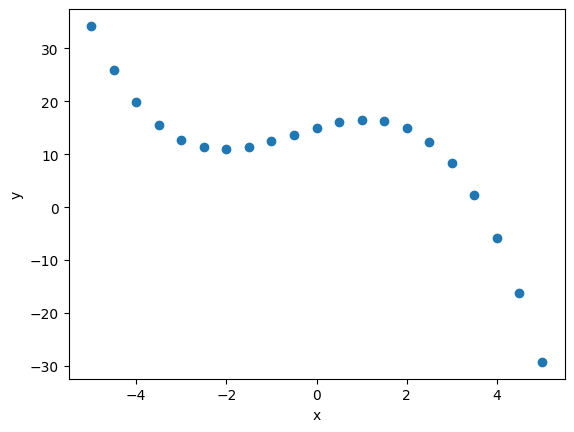

In [10]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
#plt.scatter(x_list, correctFunction(x_list))

Modify x and y values by adding random numbers

In [11]:
#np.random.rand(npoints)

In [12]:
0.1 * (2*np.random.rand(npoints)-1)


array([ 0.06557844, -0.09667564,  0.08158472,  0.02651742, -0.0807602 ,
       -0.07845136,  0.03560299, -0.05119717,  0.09822452,  0.01216403,
        0.05393636, -0.09106812,  0.08439342,  0.08407685, -0.05278231,
       -0.08813946,  0.0848684 ,  0.00307735, -0.00624769,  0.03028017,
        0.04909246])

In [13]:
print(len(data0))

2


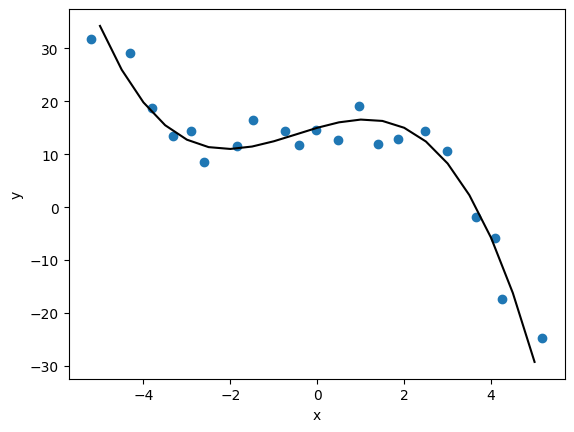

In [14]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1),
                  data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])


## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

In [15]:
from scipy import interpolate
splineLinear0 = interpolate.interp1d(x_list, correctFunction(x_list), kind = 'linear') #only show for the x-axis

a = splineLinear0(x_list)
print(a)

[ 34.25     25.96875  19.8      15.48125  12.75     11.34375  11.
  11.45625  12.45     13.71875  15.       16.03125  16.55     16.29375
  15.       12.40625   8.25      2.26875  -5.8     -16.21875 -29.25   ]


- Linear splines

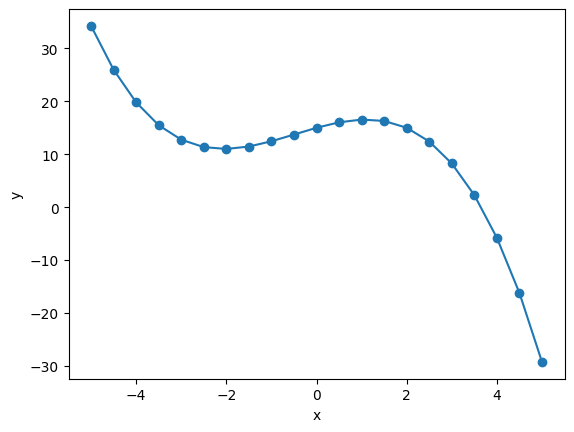

In [16]:
from scipy import interpolate

splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))


- zoom

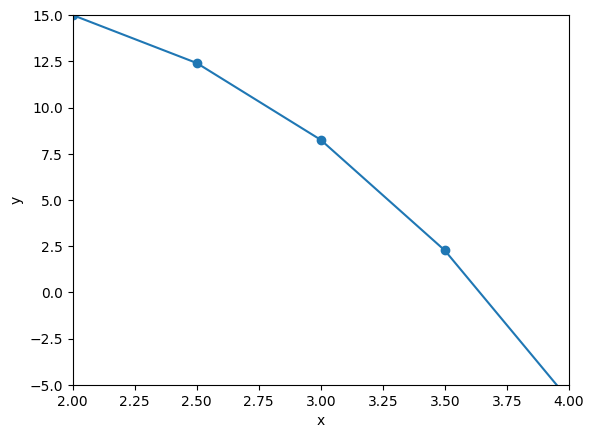

In [17]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- Cubic spline

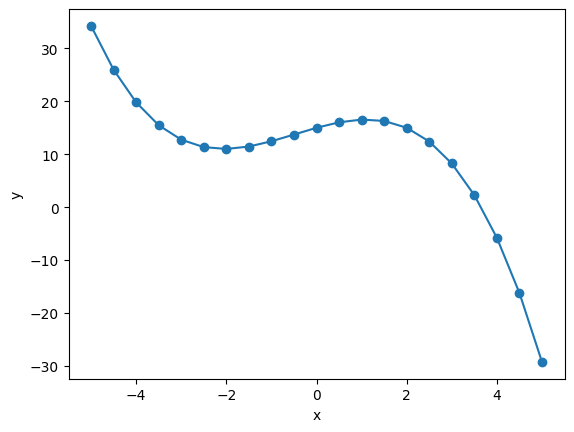

In [18]:
from scipy import interpolate

splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))


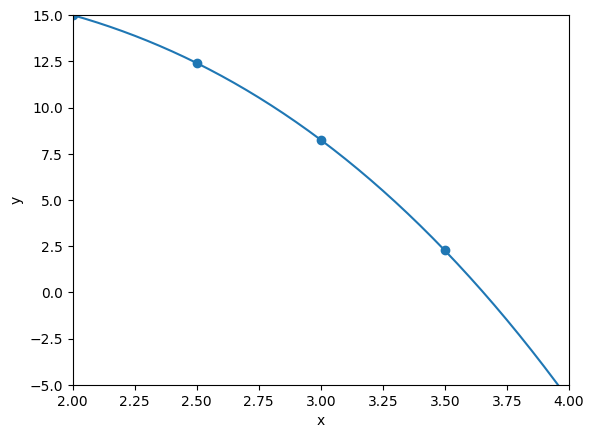

In [19]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])

plt.scatter(data0[0], data0[1])
x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))


### 2.2.2 Perturbed data

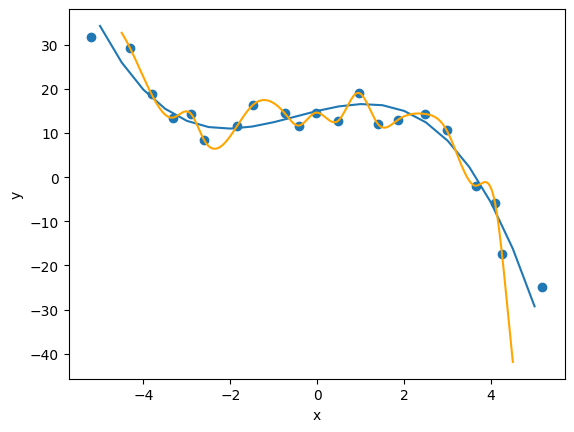

In [20]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901) # the xlist has been redefined so it is not identic as before 
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list), color = 'orange')

- How to handle data which is not smooth?

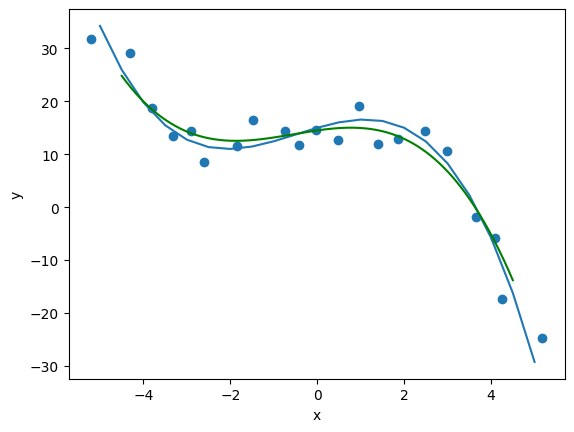

In [21]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list), color = 'green') # smoothen the xlist

### Add-on: How you can always fit data with a polynomial

In [22]:
datapoly = data[:,7:14]
datapoly

array([[-1.47409117, -0.75036734, -0.42257476, -0.03931278,  0.47349278,
         0.94878168,  1.40533184],
       [16.41706107, 14.48314298, 11.69067856, 14.58973627, 12.71534166,
        19.08347952, 11.93267331]])

We have 7 data points. That means we need a 6th order polynomial for the perfect interpolation

$$ f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5 + a_6x^6 $$

This polynomial gives the correct value for all points $ x_i, y_i $

$$ y_i = a_0 + a_1x_i + a_2x_i^2 + a_3x_i^3 + a_4x_i^4 + a_5x_i^5 + a_6x_i^6 $$

We can express these 7 equations $( i = 0,\dots, 6 )$ as a matrix equation

$$
\begin{pmatrix}
y_0\\y_1\\y_2\\y_3\\y_4\\y_5\\y_6
\end{pmatrix} = \begin{pmatrix}
1&x_0&x_0^2&x_0^3&x_0^4&x_0^5&x_0^6\\
1&x_1&x_1^2&x_1^3&x_1^4&x_1^5&x_1^6\\
1&x_2&x_2^2&x_2^3&x_2^4&x_2^5&x_2^6\\
1&x_3&x_3^2&x_3^3&x_3^4&x_3^5&x_3^6\\
1&x_4&x_4^2&x_4^3&x_4^4&x_4^5&x_4^6\\
1&x_5&x_5^2&x_5^3&x_5^4&x_5^5&x_5^6\\
1&x_6&x_6^2&x_6^3&x_6^4&x_6^5&x_6^6
\end{pmatrix}\begin{pmatrix}
a_0\\a_1\\a_2\\a_3\\a_4\\a_5\\a_6
\end{pmatrix}
$$

The middle matrix is just a matrix of numbers that we can calculate

In [23]:
x = np.transpose(
    np.array([
        datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6
    ])
)
print(x)

[[ 1.00000000e+00 -1.47409117e+00  2.17294478e+00 -3.20311872e+00
   4.72168902e+00 -6.96020009e+00  1.02599695e+01]
 [ 1.00000000e+00 -7.50367336e-01  5.63051140e-01 -4.22495184e-01
   3.17026586e-01 -2.37886395e-01  1.78502180e-01]
 [ 1.00000000e+00 -4.22574759e-01  1.78569427e-01 -7.54589325e-02
   3.18870402e-02 -1.34746583e-02  5.69405049e-03]
 [ 1.00000000e+00 -3.93127759e-02  1.54549435e-03 -6.07576729e-05
   2.38855278e-06 -9.39006401e-08  3.69149482e-09]
 [ 1.00000000e+00  4.73492777e-01  2.24195410e-01  1.06154908e-01
   5.02635820e-02  2.37994430e-02  1.12688644e-02]
 [ 1.00000000e+00  9.48781678e-01  9.00186673e-01  8.54080622e-01
   8.10336046e-01  7.68831993e-01  7.29453709e-01]
 [ 1.00000000e+00  1.40533184e+00  1.97495757e+00  2.77547074e+00
   3.90045739e+00  5.48143694e+00  7.70323784e+00]]


In [24]:
y = datapoly[1,:]
print(y)

[16.41706107 14.48314298 11.69067856 14.58973627 12.71534166 19.08347952
 11.93267331]


In [25]:
a = np.linalg.solve(x, y)
print(a)

[ 14.7115983    2.2795457  -21.11471126  -4.53387664  46.28174657
   0.42086659 -17.4634458 ]


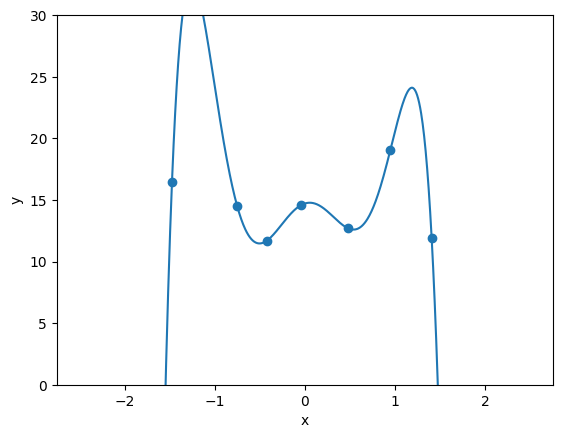

In [26]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,30])

x_list = np.linspace(-2.5,2.5,901)
y_list = a[0]*x_list**0 + a[1]*x_list**1 + a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: $$ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k $$

In [27]:
def polynomialModel(x,a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x **k
    return t

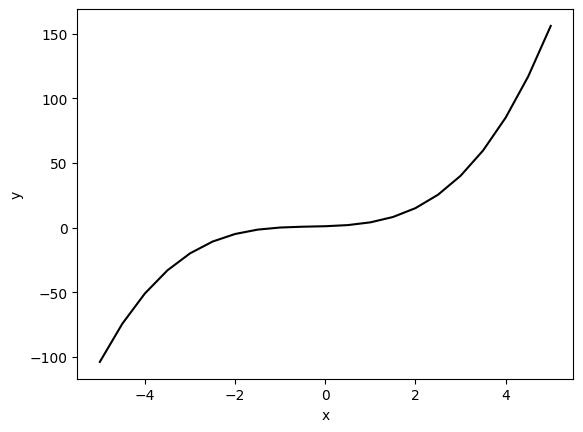

In [28]:
#a0 = np.array([15, 2.4, -0.5, -0.35])
a0 = np.array([1, 1, 1, 1])

plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0),'black')

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: $$ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2$$

$f$ is the fit function that is determined by the coefficients $a_i$ in our case.

$(x_i, y_i)$ are the data points that we try to fit.

In [29]:
def errorfit(f, coef, data):
    # f : is the function
    # coef: is the a_i that we want to optimize 
    # data: date we try to fit 

    error = 0
    for i in range(len(data[0])):
        error = error + ( data[1,i] - f(data[0,i], coef))**2
        #print(error)
    return error

In [30]:
errorfit(polynomialModel, a0, data)

106872.2341215788

This, we could find out by calculating the error of its value, and it will be a very large number much larger than this one, because this one is actually the value that we got for the correct parameters. And what will happen then is we will loop and in the loop.
We will update our values, our parameters, our coefficients, and we will update them in a way so
that the error function will be decreased. So it will get smaller and smaller.
And to do this, there exists several reasonable methods and we will later in this course discuss something called Monte Carlo algorithm. 

We would exploit just randomness to decrease the error which is a very typical method that is used very often. It's called gradient descent or gradient descent methods.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients $ a_i $ will be updated along the gradient direction of the error function $ \nabla_{\vec{a}} \Delta$. The gradient consists of elements $$ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k} $$

The so-called gradient and the gradient when you're calculated will always point along the direction of the largest slope.
So when you have the steepest way.
So this will be the fastest way to climb up the mountain.
So this will be a vector, and the components of this vector will be the partial derivatives.


We take out parameters a zero, calculate the gradient, go along the opposite direction and update
our parameters.
And then we do it again.
We calculate once again the gradient and we loop over this process several times, and this should bring
us down to the minimum value for the error itself.
And these will then be our final parameters.

In [31]:
import numpy as np

def errorGrad(f, coef, data):
    """
    Compute the gradient of the error function for polynomial fitting.

    Parameters:
    - f: Fit function (polynomial) taking coefficients and x as arguments.
    - coef: Coefficients (a_i) that we want to optimize.
    - data: Data to fit, represented as a 2D array where data[0, :] contains x values
            and data[1, :] contains corresponding y values.

    Returns:
    - Gradient of the error function with respect to coefficients.
    """
    num_coefficients = len(coef)
    
    # Compute the gradient using the formula: -2 * sum((y_i - f(x_i, coef)) * x_i^k)
    gradient = -2 * np.array([
        np.sum([
            (data[1, i] - f(data[0, i], coef)) * data[0, i]**k
            for i in range(len(data[0]))
        ])
        for k in range(num_coefficients)
    ])

    return gradient


In [33]:
errorGrad(polynomialModel, a0, data)

array([2.59031837e+01, 8.03846519e+03, 4.97335235e+03, 1.63664862e+05])

### 2.3.4 Loop for the actual fitting

In [34]:
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

for i in range(iterations):
    a = a - h * errorGrad(polynomialModel, a, data)

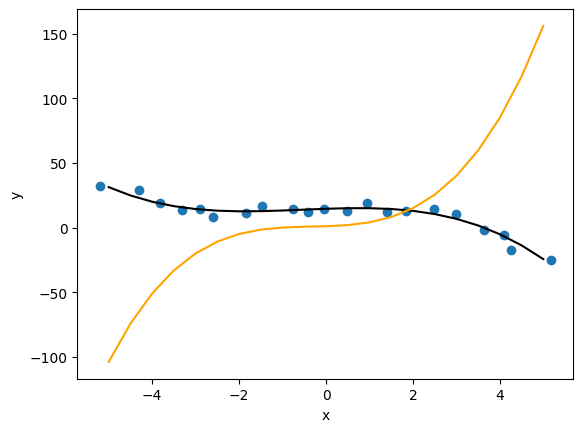

In [35]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a),'black')
plt.plot(x_list, polynomialModel(x_list, a0),'orange')
plt.scatter(data[0], data[1])

In [36]:
print(errorfit(polynomialModel, a, data))
print(errorfit(polynomialModel, a0, data))

238.6798053019537
106872.2341215788


- Comparison of a and a0

In [37]:
print(a)
print(a0)

[14.50630617  1.1658538  -0.44459559 -0.26945814]
[1 1 1 1]
